## Касьянов Семен. Вариант 15

In [34]:
import numpy as np
from matplotlib import pyplot as plt

## Теоретические сведения

Подобрать коэффициенты аппроксимирующей функции на основе таблицы. \
\
Использовать функции типа $\sum_{k=1}^n u_k \operatorname{sh} k x, n=\{1,2,3\}$. Построить графики аппроксимирующих функций и сравнить с табличными значениями. Подобрать наилучшую аппроксимацию с помощью проверки среднеквадратического отклонения. \
\
Приведём табличные данные ниже.

In [35]:
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0, 0.4, 0.81, 1.26, 1.77, 2.35, 3.03, 3.84, 4.82, 6.01, 7.44])

Мы аппроксимируем наши значения различными полиномами вида $Q_p\left(x_k\right)=\sum_{j=0}^p u_j \varphi_j(x)$, где $\varphi_j(x)$ - образуют систему линейно независимых базисных функций


\begin{aligned}
& Q_p\left(x_k\right)=\sum_{j=0}^p u_j \varphi_j(x)=f\left(x_k\right) \leftrightarrow \\
& \left\{\begin{array}{l}
u_0 \varphi_0\left(x_0\right)+u_1 \varphi_1\left(x_0\right)+\cdots+u_p \varphi_p\left(x_0\right)=f_0 \\
u_0 \varphi_0\left(x_1\right)+u_1 \varphi_1\left(x_1\right)+\cdots+u_p \varphi_p\left(x_1\right)=f_1 \\
\cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \\
u_0 \varphi_0\left(x_n\right)+u_1 \varphi_1\left(x_n\right)+\cdots+u_p \varphi_p\left(x_n\right)=f_n
\end{array}\right. \\
&
\end{aligned}

При этом нам необходимо, что функционал ошибки $S=\sum_{k=0}^n\left(Q_p\left(x_k\right)-f\left(x_k\right)\right)^2$ при аппроксимации был минимален.\
\
Для этого мы проверяем необходимое и достаточное условия экстремума: $\cfrac{\partial S}{\partial u_j}=0, \quad d^2 S=\sum_{i, j=0}^p \cfrac{\partial^2 S}{\partial u_i \partial u_j} d u_i d u_j>0$

Из необходимого условия экстремума можно получить следующую систему уравнений, с которой мы и будем работать далее:
$$
\begin{gathered}
\sum_{j=0}^p\left(\sum_{k=0}^n \varphi_i\left(x_k\right) \varphi_j\left(x_k\right)\right) u_j=\sum_{k=0}^n f_k \varphi_i\left(x_k\right), i \in[1, p]: \\
\left\{\begin{array}{l}
\left(\varphi_0, \varphi_0\right) u_0+\left(\varphi_0, \varphi_1\right) u_1+\cdots+\left(\varphi_0, \varphi_p\right) u_p=\left(\varphi_0, f\right) \\
\left(\varphi_1, \varphi_0\right) u_0+\left(\varphi_1, \varphi_1\right) u_1+\cdots+\left(\varphi_1, \varphi_p\right) u_p=\left(\varphi_1, f\right) \\
\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \\
\left(\varphi_p, \varphi_0\right) u_0+\left(\varphi_p, \varphi_1\right) u_1+\cdots+\left(\varphi_p, \varphi_p\right) u_p=\left(\varphi_p, f\right)
\end{array}\right.
\end{gathered}
$$

## Подбор коэффициентов и построение графиков

Зададим функцию, которая будет вычислять матрицу, как указано выше

In [83]:
def matrix(n): 

    x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    y = np.array([0, 0.4, 0.81, 1.26, 1.77, 2.35, 3.03, 3.84, 4.82, 6.01, 7.44])
    
    s = (n, n)
    A = np.zeros(s)

    for i in range (1, n + 1):
        for j in range (i, n + 1):
            summ = 0
            for k in range (len(x)):
                summ += np.sinh(i * x[k]) * np.sinh(j * x[k])
            A[i - 1][j - 1] = summ
            A[j - 1][i - 1] = summ

    s = (1, n)
    f = np.zeros(s)

    for i in range (1, n + 1):
        summ = 0
        for k in range (len(x)):
            summ += np.sinh(i * x[k]) * y[k]
        f[0][i - 1] = summ

    return A, f

Зададим функцию, которая будет решать СЛАУ, находя коэффициенты полинома

In [78]:
def solve_equation(A, f, n): 
    
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range (n):
        L[i][i] = 1

    for i in range (n):
        for j in range (n):
            if i <= j:
                sum = 0
                for k in range (i+1):
                    sum += L[i][k] * U[k][j]
                U[i][j] = A[i][j] - sum

            else:
                sum = 0
                for k in range (j+1):
                    sum += L[i][k] * U[k][j]
                L[i][j] = 1/U[j][j] * (A[i][j] - sum)

    y = np.zeros([n,1])
    y[0] = f[0][0]
    for i in range (1, n):
        sum = 0
        for j in range (i):
            sum += y[j]*L[i][j]
        y[i] = f[0][i] - sum

    x = np.zeros([n,1])
    x[n - 1] = y[n - 1]/U[n - 1][n - 1]
    for k in range (n - 2, -1, -1):
        sum = 0
        for j in range (k+1, n):
            sum += U[k][j] * x[j]
        x[k] = (1 / U[k][k]) * (y[k] - sum)

    return x

Зададим функцию, которая будет строить на одном графике исходные значения и полученный нами полином

In [130]:
def plot(u):
    
    x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    y = np.array([0, 0.4, 0.81, 1.26, 1.77, 2.35, 3.03, 3.84, 4.82, 6.01, 7.44])

    px = np.linspace(0, 1, 101)
    py = np.zeros(101)
    for i in range (len(u)):
        py += u[i][0] * np.sinh(px * (i + 1))

    fig, ax = plt.subplots(figsize = (16, 9))
    plt.plot(x, y, c = 'r', label = 'Дано')
    plt.plot(px, py, c = 'b', label = f'Полином длины {len(u)}')
    plt.grid()
    plt.legend()
    plt.title('График начальных данных и построенного полинома')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Воспользуемся функциями выше

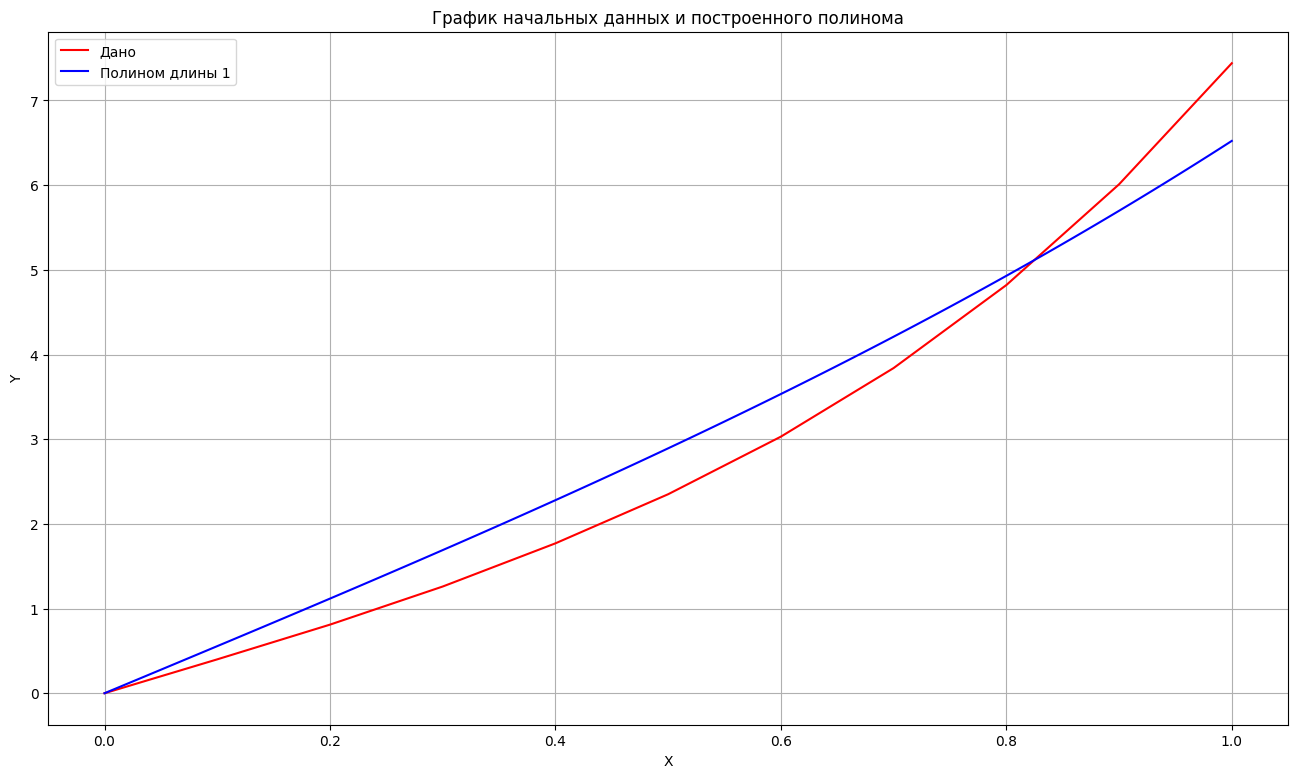

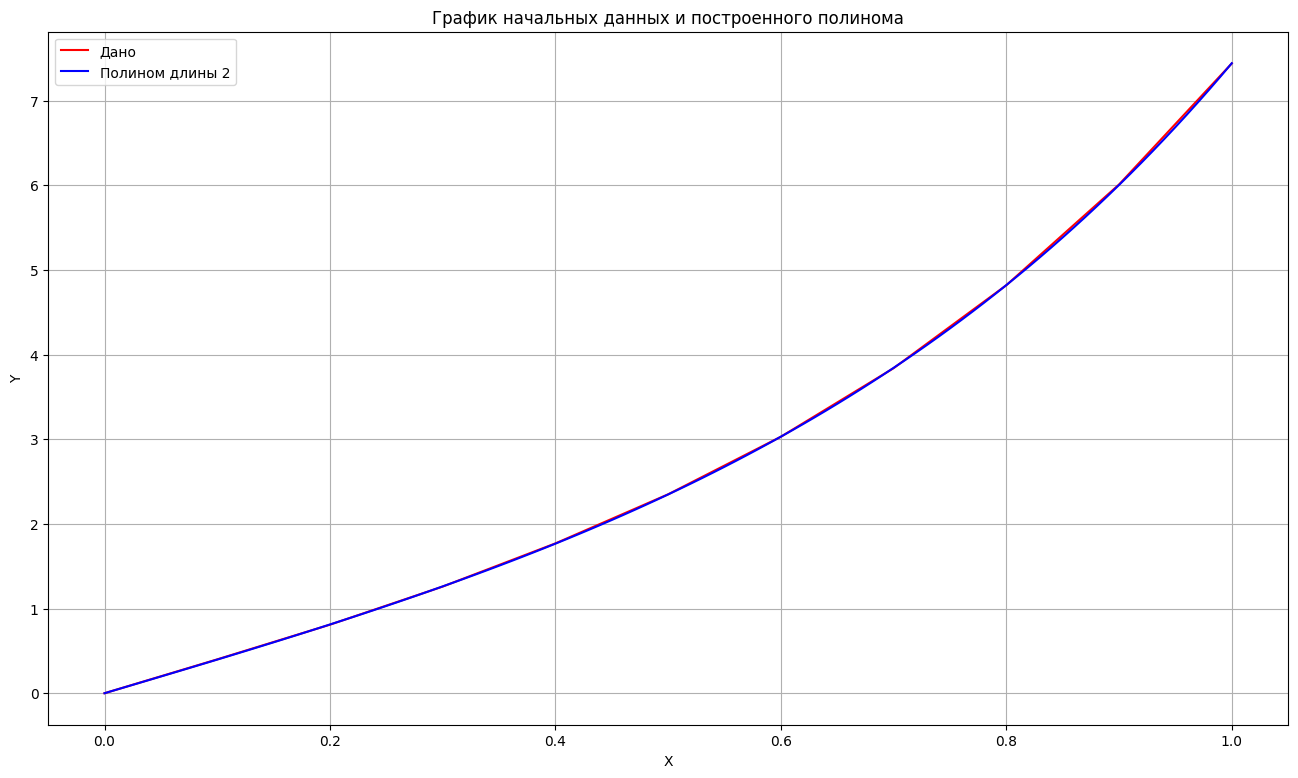

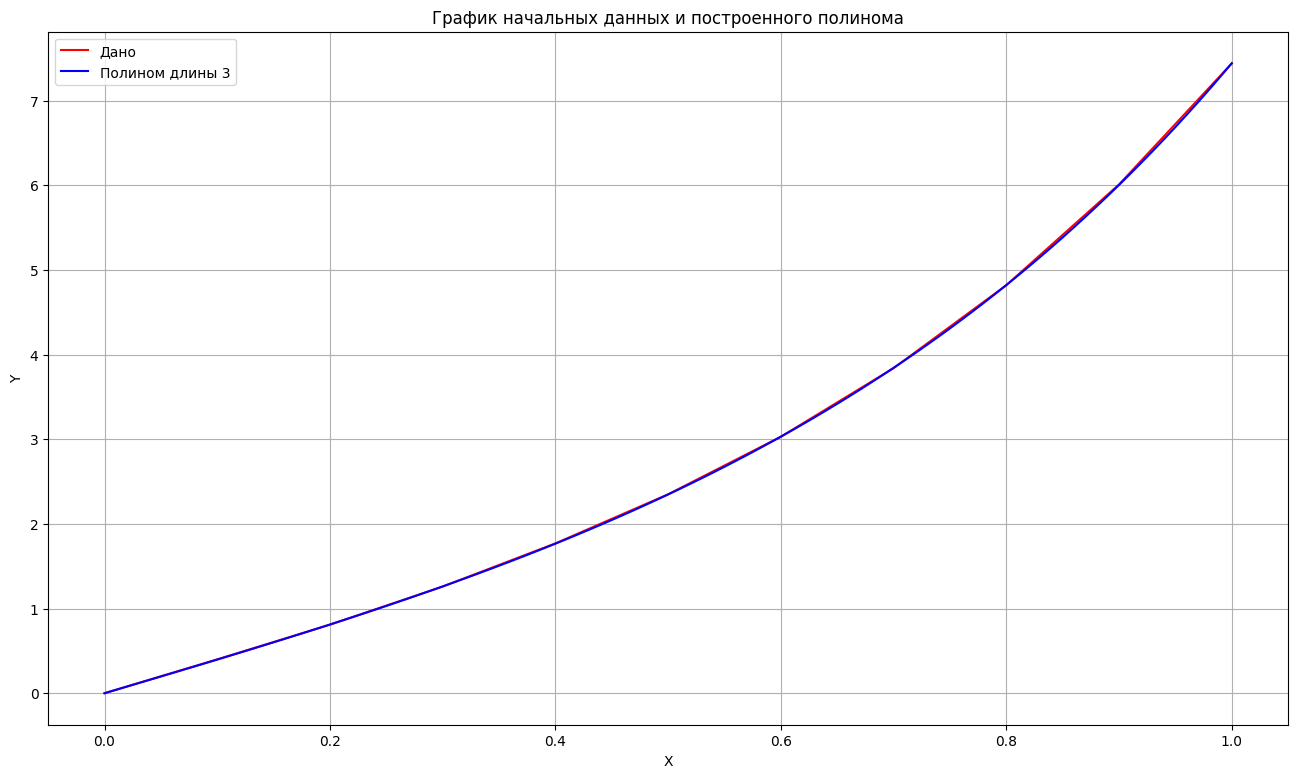

In [141]:
coef = [] # Здесь будем запоминать полученные коэффициенты
for n in range (1, 4):
    A, f = matrix(n)
    u = solve_equation(A, f, n)
    coef.append(u)
    plot(u)

Из графиков видно, что полином первого порядка значительно отличается от табличных данных, а полиномы второго и третьего порядков с высокой точностью аппроксимируют значения

## Подбор наилучшей аппроксимации

Рассчитаем функционал ошибки для каждого из полиномов

In [156]:
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0, 0.4, 0.81, 1.26, 1.77, 2.35, 3.03, 3.84, 4.82, 6.01, 7.44])

S = [] # Сюда будем заносить значения ошибки функционала для каждого из полиномов

for i in range (1, 4):
    values = np.zeros(11)
    for j in range (1, i + 1):
        values += coef[i - 1][j - 1][0] * np.sinh(x * j)

    summ = 0
    for k in range (len(x)):
        summ += (values[k] - y[k])**2
    S.append(summ)

[2.1996461379102827, 8.235466900775785e-05, 8.180350278587907e-05]

Значения функционалов ошибки для каждого из полиномов: $\;2.1996, \quad 8.2355 \cdot 10^{-5}, \quad 8.1804 \cdot 10^{-5}$ \
\
Таким образом, можно сделать вывод, что наиболее точную аппроксимацию даёт полином третьего порядка, хотя значения функционалов ошибки для полиномов второго и третьего порядка отличаются незначительно.